# Automobile Industry Project

A comprehensive automotive dataset is utilised, encompassing details such as car make, model, year, fuel type, horsepower, price, and more. Python libraries will be leveraged for diverse data wrangling techniques. Through data manipulation and cleansing, the dataset will undergo transformations, enabling thorough analysis and extraction of valuable insights. 

### Importing necessary libraries





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\asifs\Desktop\DS Projects\Assignments\Cars_data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Dataset Columns Information**

Make: The Make feature is the company name of the Car.<br>

Model: The Model feature is the model or different version of Car models.<br>

Year:  The year describes the model has been launched.<br>

Engine Fuel Type: It defines the Fuel type of the car model.<br>

Engine HP: It's say the Horsepower that refers to the power an engine produces.<br>

Engine Cylinders: It define the nos of cylinders in present in the engine.<br>

Transmission Type: It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>

Driven_Wheels: The type of wheel drive.<br>

No of doors: It defined nos of doors present in the car.<br>

Market Category: This features tells about the type of car or which category the car belongs. <br>

Vehicle Size: It's say about the about car size.<br>

Vehicle Style: The feature is all about the style that belongs to car.<br>

Highway MPG: The average a car will get while driving on an open stretch of road without stopping or starting, typically at 
higher speed.<br>

City MPG: City MPG refers to driving with occasional stopping and braking.<br>

Popularity: It can refered to rating of that car or popularity of car.<br>

MSRP: The price of that car.







### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Dropping Irrevalent Columns

If we consider all the columns present in the dataset, then unneccessary columns will impact the model's accuracy. Hence we need to drop the columns that are irrevalent. Otherwise it will affect our model.

["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]

These features are not neccessary to obtain the model's accucary as it does not contain any relevant information. 

In [5]:
cols_to_drop = ['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size']

In [6]:
df = df.drop(cols_to_drop, axis = 1)

df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


#### Fixing the Column Names

In [7]:
df.columns = (['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven Wheels', 'Highway MPG', 'City MPG',
       'MSRP'])

In [8]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Highway MPG,City MPG,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Dropping Duplicate Rows

In [9]:
# number of rows before removing duplicated rows

df.shape

(11914, 10)

In [10]:
df = df.drop_duplicates()

df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Highway MPG,City MPG,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [11]:
# number of rows after removing duplicated rows

df.shape

(10925, 10)

## Dropping the null or missing values

In [12]:
# checking for null values

df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven Wheels         0
Highway MPG           0
City MPG              0
MSRP                  0
dtype: int64

In [13]:
# dropping null values

df = df.dropna()  

In [14]:
# checking for null values after removal

df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven Wheels        0
Highway MPG          0
City MPG             0
MSRP                 0
dtype: int64

In [15]:
# dataframe statistics

df.describe()

,Year,Engine HP,Engine Cylinders,Highway MPG,City MPG,MSRP
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## Handling Outliers

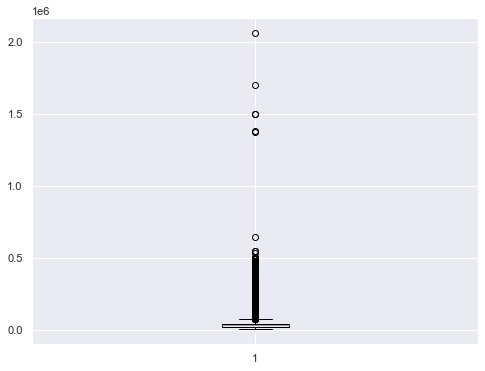

In [16]:
# Boxplot for 'Price'   

plt.figure(figsize = (8, 6))
plt.boxplot(df['MSRP'])
plt.show()

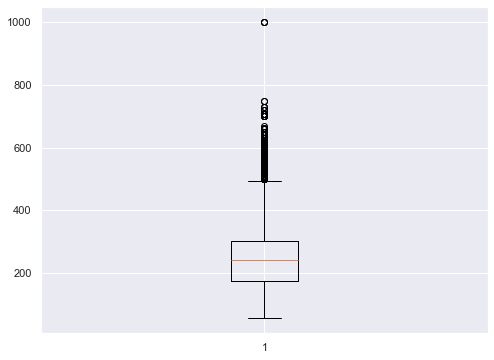

In [17]:
# Boxplot for 'HP'  

plt.figure(figsize = (8, 6))
plt.boxplot(df['Engine HP'])
plt.show()

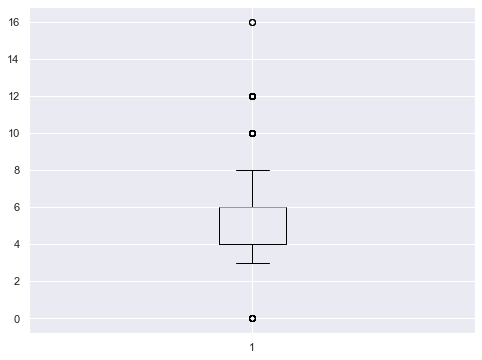

In [18]:
# Boxplot for 'Engine Cylinders'  

plt.figure(figsize = (8, 6))
plt.boxplot(df['Engine Cylinders'])
plt.show()

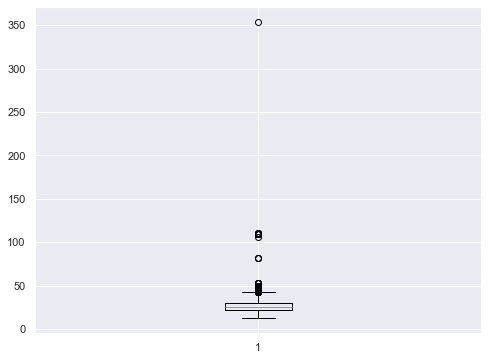

In [19]:
# Boxplot for 'Highway MPG'  

plt.figure(figsize = (8, 6))
plt.boxplot(df['Highway MPG'])
plt.show()

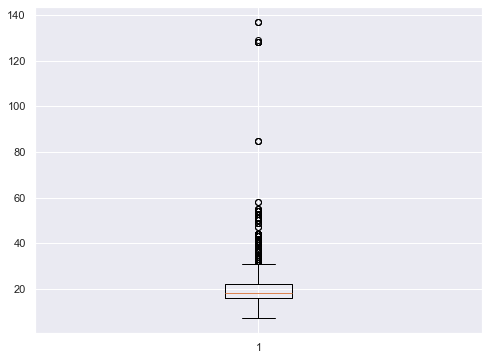

In [20]:
# Boxplot for 'City MPG'  

plt.figure(figsize = (8, 6))
plt.boxplot(df['City MPG'])
plt.show()

In [21]:
# Features that are of 'int' or 'float'
df.select_dtypes(include = ['int', 'float'])

,Year,Engine HP,Engine Cylinders,Highway MPG,City MPG,MSRP
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


In [22]:
# Saving the Features from above Output in a list

l = df.select_dtypes(include = ['int', 'float'])

## Outliers Removal - IQR Method
 

In [23]:
# Removing Outliers from Feature 'Engine HP'

# Define Q1 & Q2
df['Engine HP']

Q1 = np.percentile(df['Engine HP'], 25)
Q3 = np.percentile(df['Engine HP'], 75)

# Define IQR (interquantile range) 
IQR = Q3 - Q1    

# Define Upper and Lower Quartile 
low_q = Q1 - 1.5 * IQR
upp_q = Q3 + 1.5 * IQR

outliers_index = (df['Engine HP'] > upp_q) | (df['Engine HP'] < low_q)
df2 = df.drop(df[outliers_index].index)

In [24]:
# Removing Outliers from Feature 'Engine Cylinders'

# Define Q1 and Q2
df2['Engine Cylinders']

Q1 = np.percentile(df2['Engine Cylinders'], 25)
Q3 = np.percentile(df2['Engine Cylinders'], 75)

# Define IQR (interquantile range)
IQR = Q3 - Q1    

# Define Upper and Lower Quartile 
low_q = Q1 - 1.5 * IQR
upp_q = Q3 + 1.5 * IQR

outliers_index = (df2['Engine Cylinders'] > upp_q) | (df2['Engine Cylinders'] < low_q)
df3 = df2.drop(df2[outliers_index].index)

In [25]:
# Removing Outliers from Feature 'Highway MPG'

# Define Q1 and Q2
df3['Highway MPG']

Q1 = np.percentile(df3['Highway MPG'], 25)
Q3 = np.percentile(df3['Highway MPG'], 75)

# Define IQR (interquantile range) 
IQR = Q3 - Q1    

# Define Upper and Lower Quartile 
low_q = Q1 - 1.5 * IQR
upp_q = Q3 + 1.5 * IQR

outliers_index = (df3['Highway MPG'] > upp_q) | (df3['Highway MPG'] < low_q)
df4 = df3.drop(df3[outliers_index].index)

In [26]:
# Removing Outliers from Feature 'City MPG'

# Define Q1 and Q2
df4['City MPG']

Q1 = np.percentile(df4['City MPG'], 25)
Q3 = np.percentile(df4['City MPG'], 75)

# Define IQR (interquantile range)  
IQR = Q3 - Q1    

# Define Upper and Lower Quartile 
low_q = Q1 - 1.5 * IQR
upp_q = Q3 + 1.5 * IQR

outliers_index = (df4['City MPG'] > upp_q) | (df4['City MPG'] < low_q)
df5 = df4.drop(df4[outliers_index].index)

In [27]:
# Removing Outliers from Feature 'MSRP'

# Define Q1 and Q2
df5['MSRP']

Q1 = np.percentile(df5['MSRP'], 25)
Q3 = np.percentile(df5['MSRP'], 75)

# Define IQR (interquantile range) 
IQR = Q3 - Q1    

# Define Upper and Lower Quartile 
low_q = Q1 - 1.5 * IQR
upp_q = Q3 + 1.5 * IQR

outliers_index = (df5['MSRP'] > upp_q) | (df5['MSRP'] < low_q)
df6 = df5.drop(df5[outliers_index].index)

In [28]:
# Shape of df & df6
print(df.shape)
print(df6.shape)

(10827, 10)
(9507, 10)


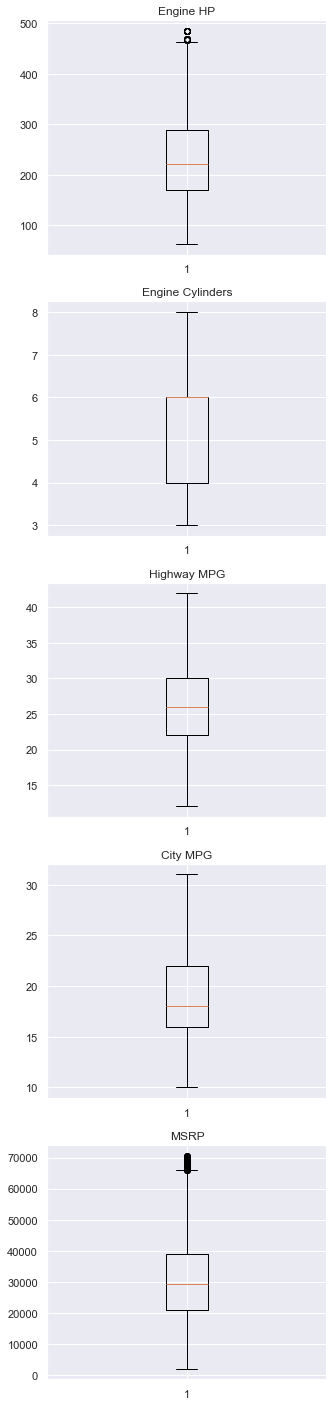

In [29]:
# Plot the Features after Removing the Outliers

plt.figure(figsize = (5, 25))

plt.subplot(5, 1, 1)
plt.title('Engine HP')
plt.boxplot(df6['Engine HP'])

plt.subplot(5, 1, 2)
plt.title('Engine Cylinders')
plt.boxplot(df6['Engine Cylinders'])

plt.subplot(5, 1, 3)
plt.title('Highway MPG')
plt.boxplot(df6['Highway MPG'])

plt.subplot(5, 1, 4)
plt.title('City MPG')
plt.boxplot(df6['City MPG'])

plt.subplot(5, 1, 5)
plt.title('MSRP')
plt.boxplot(df6['MSRP'])

plt.show()

In [30]:
# Unique Values and there Counts for each Feature 

for i in df6.columns:
    print ("--------------- {} ----------------".format(i))
    vc = df6[i].value_counts()
    print(vc)

--------------- Make ----------------
Make
Chevrolet        1002
Ford              763
Toyota            578
Nissan            529
Volkswagen        528
Dodge             492
GMC               473
Mazda             388
Honda             375
Suzuki            337
Infiniti          325
Cadillac          294
Audi              255
Hyundai           247
Volvo             241
Acura             239
Subaru            229
Mercedes-Benz     222
Kia               211
BMW               208
Chrysler          185
Mitsubishi        185
Buick             184
Pontiac           163
Lexus             161
Lincoln           139
Oldsmobile        111
Saab              101
Land Rover         86
Plymouth           62
FIAT               58
Scion              55
Porsche            37
Lotus              17
HUMMER             17
Alfa Romeo          5
Genesis             3
Maserati            2
Name: count, dtype: int64
--------------- Model ----------------
Model
Silverado 1500    156
F-150             126
Sierra

## Visualising Univariate Distributions 

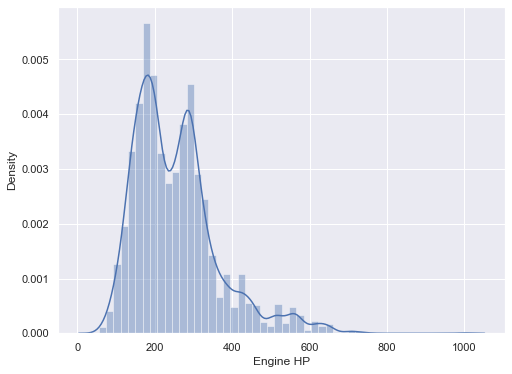

In [31]:
# distplot for Feature 'HP'

plt.figure(figsize = (8, 6))
sns.distplot(df['Engine HP'])
plt.show()

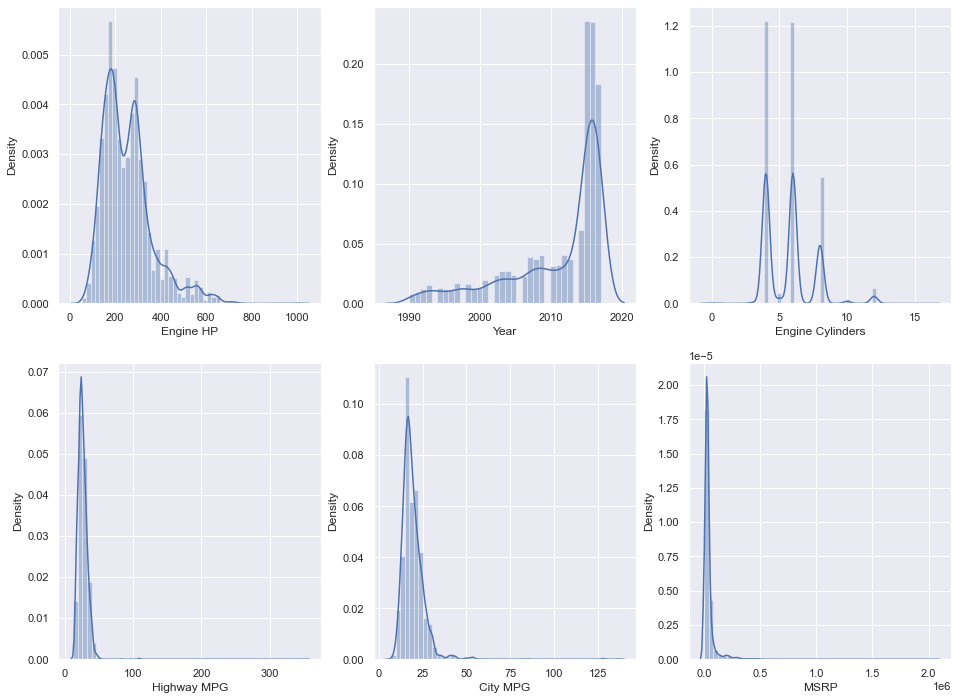

In [32]:
# plotting the remaining Features

plt.figure(figsize = (16, 12))

plt.subplot(2, 3, 1)
sns.distplot(l['Engine HP'])

plt.subplot(2, 3, 2)
sns.distplot(l['Year'])

plt.subplot(2, 3, 3)
sns.distplot(l['Engine Cylinders'])

plt.subplot(2, 3, 4)
sns.distplot(l['Highway MPG'])

plt.subplot(2, 3, 5)
sns.distplot(l['City MPG'])

plt.subplot(2, 3, 6)
sns.distplot(l['MSRP'])
plt.show()

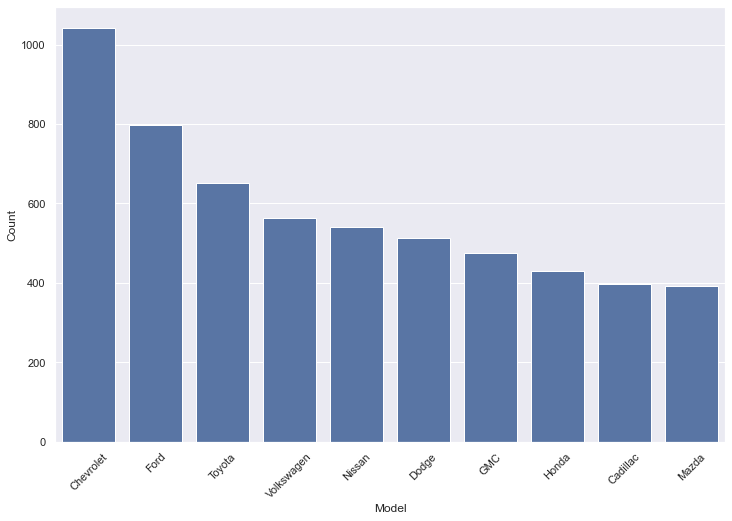

In [38]:
# histogram for the number of different Car Models

plt.figure(figsize = (12,8))
top_n = 10
top_values = df['Make'].value_counts().nlargest(top_n)
sns.barplot(x = top_values.index, y = top_values)
plt.xticks(rotation = 45)
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

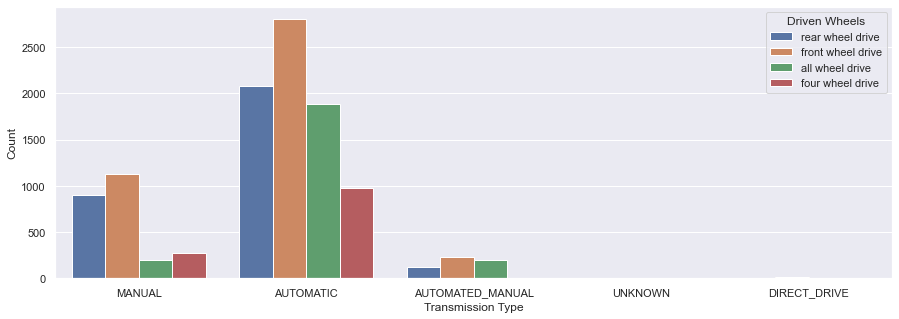

In [41]:
# countplot on 'Transmission Type' and 'Driven Wheels'

plt.figure(figsize=(15,5))
sns.countplot(x = df['Transmission Type'], hue = df['Driven Wheels'])
plt.ylabel('Count')
plt.show()

## Visualising Bivariate Distributions

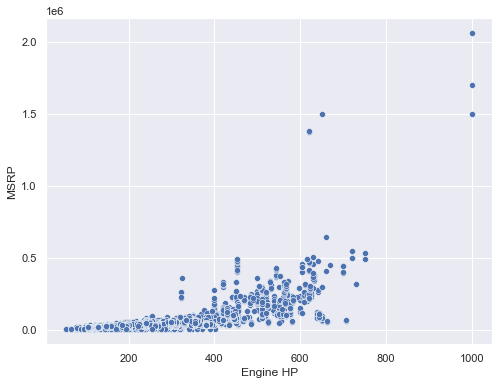

In [51]:
# Plot for 'Engine HP' and 'MSRP'

plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['Engine HP'], y = df['MSRP'], marker = 'o', edgecolor = 'white')
plt.show()

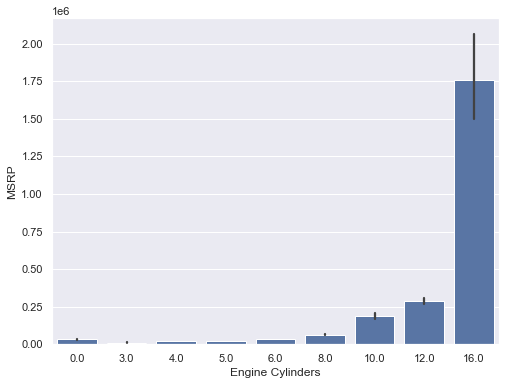

In [52]:
# bar plot with mean between Cylinder and Price

plt.figure(figsize = (8, 6))
sns.barplot(x = df['Engine Cylinders'], y = df['MSRP'])
plt.show()

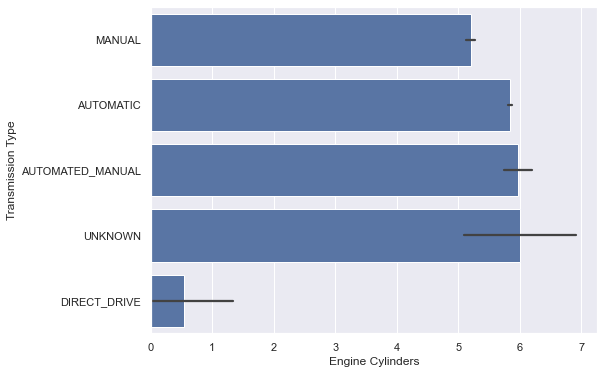

In [54]:
# barplot between Engine Cylinders and Transmission Type

plt.figure(figsize = (8, 6))
sns.barplot(x = df['Engine Cylinders'], y = df['Transmission Type'])
plt.show()

## Visualizing Multivariate Distributions



Using heatmaps plot the correlation between the features present in the dataset.

In [56]:
# correlation of features within the data 
corr = l.corr()

# print correlation matrix
print(corr)

                      Year  Engine HP  Engine Cylinders  Highway MPG  \
Year              1.000000   0.314971         -0.050598     0.284237   
Engine HP         0.314971   1.000000          0.788007    -0.420281   
Engine Cylinders -0.050598   0.788007          1.000000    -0.611576   
Highway MPG       0.284237  -0.420281         -0.611576     1.000000   
City MPG          0.234135  -0.473551         -0.632407     0.841229   
MSRP              0.196789   0.659835          0.554740    -0.209150   

                  City MPG      MSRP  
Year              0.234135  0.196789  
Engine HP        -0.473551  0.659835  
Engine Cylinders -0.632407  0.554740  
Highway MPG       0.841229 -0.209150  
City MPG          1.000000 -0.234050  
MSRP             -0.234050  1.000000  


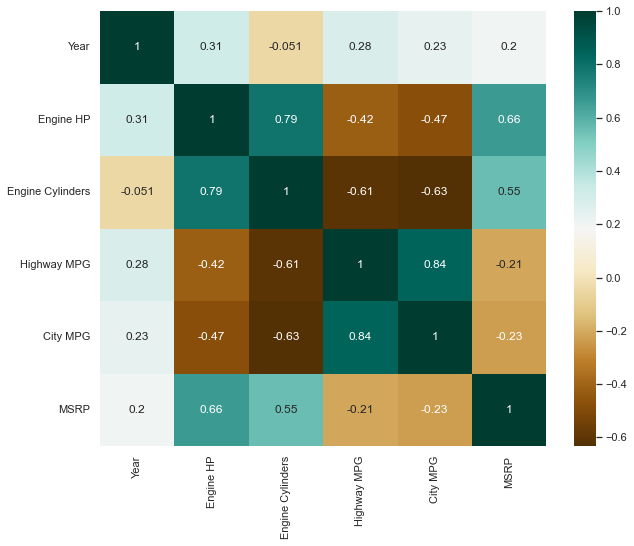

In [57]:
# plotting heatmap for the dataset 

plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = 'BrBG')
plt.show()